In [11]:
import cosmology as cos
import numpy as np
import matplotlib.pyplot as plt
from astropy.cosmology import LambdaCDM
import seaborn as sea
from scipy.integrate import quad
%matplotlib inline

In [2]:
# set plotting parameters
plt.rc('text', usetex=True)
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({'xtick.direct'
               'ion': 'in','xtick.top':True,'xtick.minor.visible': True,
               'ytick.direction': "in",'ytick.right': True,'ytick.minor.visible': True})

In [17]:
# compute the evolution of the growth factor for three cosmologies 
def D(redshifts, model):
    function = lambda z: (1+z) / model.H(z).value**3
    const = 1/quad(function, 0, np.inf)[0]
    integral = np.array([quad(function, z, np.inf)[0] for z in redshifts])
    return model.H(redshifts)/model.H0 * const * integral

In [6]:
model1 = LambdaCDM(H0=70, Om0=1.0, Ode0=0)
model2 = LambdaCDM(H0=70, Om0=0.3, Ode0=0)
model3 = LambdaCDM(H0=70, Om0=0.3, Ode0=0.7)

In [7]:
redshifts = np.linspace(0, 15, 1000)
delta0 = 1.686

In [22]:
models = [model1, model2, model3]
labels = [r'$\Omega_m=1$ (Flat)', r'$\Omega_m=0.3$, $\Omega_k = 0.7$ (Open)', \
            r'$\Omega_m=0.3$, $\Omega_\Lambda=0.7$ (Flat)']

[0.84299984] [0.28099918]
[1.13978754] [0.50611748]
[1.03150431] [0.36002255]


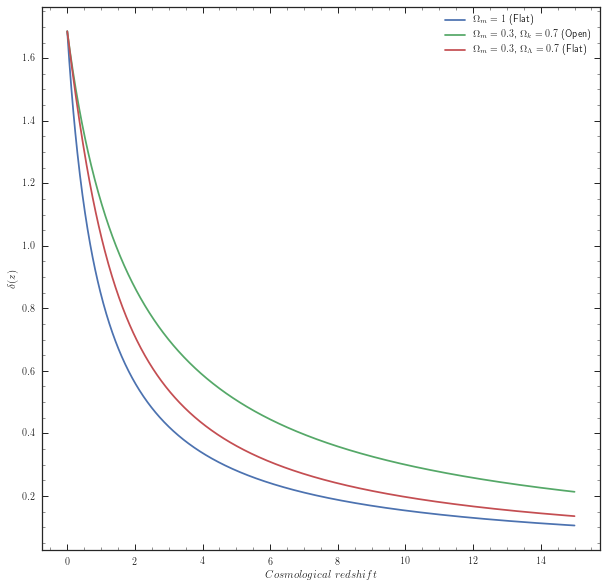

In [23]:
plt.figure(figsize=(10,10))
for model, label in zip(models, labels):
    print(delta0*D([1],model), delta0*D([5],model))
    plt.plot(redshifts, delta0*D(redshifts, model), label=label)
plt.xlabel(r'$Cosmological~ redshift$')
plt.ylabel(r'$\delta(z)$')
plt.legend(loc='best')
plt.savefig('delta_evolution.png')